4.วิเคราะห์cluster analysis เพื่อแบ่งกลุ่มลูกค้า โดยใช้เกณฑ์จาก total spending และ spending per 
order และ frequency ในการซื้อสินค้

จากโจทย์
ให้แบ่งกลุ่มลูกค้าโดยใช้เกณฑ์จาก total spending และ spending per order และ frequency ในการซื้อสินค้า

ขึ้นอยู่กับค่า x มี 3 ค่า คือ
 x1 = Total Spending 
 x2 = spending per order
 x3 = Frequency
 โดย y คือ class หรือ ผลจากการแบ่งกลุ่ม

In [1]:
import pandas as pd
df = pd.read_csv('transaction_data_clean.csv') # Load ข้อมูลที่ Clean แล้วขึ้นมา

In [2]:
df

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
...,...,...,...,...,...,...,...,...
1586007,261681,6153092,Wed Sep 19 06:23:00 IST 2018,477330,ALARM CLOCK BAKELIKE IVORY,12,5.18,Switzerland
1586008,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1586009,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1586010,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [3]:
# เก็บข้อมูล x1 (TotalSpending)
# TotalSpending ของแต่ละ TransactionId ใช้ผลรวม(sum)ของ TransactionId เดียวกัน

df['CostPerPurchased'] = df['NumberOfItemsPurchased'] * df['CostPerItem'] 
TotalSpending_df = df.groupby('TransactionId')['CostPerPurchased'].sum().reset_index()
TotalSpending_df.rename(columns={'CostPerPurchased': 'TotalSpending'}, inplace=True)
TotalSpending_df
# Output: จะได้ TotalSpeding ของแต่ละ TransactionId ออกมา

,TransactionId,TotalSpending
0,5900015,2305.20
1,5900026,368.64
2,5900037,4622.16
3,5900048,1161.36
4,5900059,295.92
...,...,...
18403,6397413,2070.72
18404,6397424,2338.56
18405,6397435,5467.68
18406,6397446,5623.20


In [4]:
# Copy ข้อมูล UserId จาก df มาใส่ TotalSpending_df
TotalSpending_df = pd.merge(TotalSpending_df, df[['TransactionId', 'UserId']], on='TransactionId', how='left')
TotalSpending_df
# Output: จะเห็นว่ามีจำนวนข้อมูลซ้ำที่เกิดจาก UserId

,TransactionId,TotalSpending,UserId
0,5900015,2305.20,374850
1,5900015,2305.20,374850
2,5900015,2305.20,374850
3,5900015,2305.20,374850
4,5900015,2305.20,374850
...,...,...,...
1586007,6397457,4138.08,266280
1586008,6397457,4138.08,266280
1586009,6397457,4138.08,266280
1586010,6397457,4138.08,266280


In [5]:
# ทำการลบข้อมูล TransactionId ที่ซ้ำออก
TotalSpending_df = TotalSpending_df.drop_duplicates(subset=['TransactionId'])
TotalSpending_df

,TransactionId,TotalSpending,UserId
0,5900015,2305.20,374850
28,5900026,368.64,374850
36,5900037,4622.16,273987
84,5900048,1161.36,273987
100,5900059,295.92,273987
...,...,...,...
1585836,6397413,2070.72,289317
1585844,6397424,2338.56,289317
1585852,6397435,5467.68,331884
1585936,6397446,5623.20,275373


In [6]:
# ทำการรวมยอดของแต่ละ TotalSpeding ที่มี UserId เดียวกัน
TotalSpending_df = TotalSpending_df.groupby('UserId')['TotalSpending'].sum().reset_index()
TotalSpending_df
# Output: ได้ข้อมูล x1 หรือ TotalSepding แล้ว

,UserId,TotalSpending
0,259266,1282435.20
1,259287,71518.80
2,259308,23964.48
3,259329,24175.68
4,259350,4886.40
...,...,...
4330,383880,2994.60
4331,383901,1339.20
4332,383922,2956.80
4333,383943,34681.44


In [7]:
# เก็บข้อมูล x2 (SpendingPerOrder)
# SpendingPerOrder ของแต่ละ TransactionId ใช้ผลรวม(sum)ของ TransactionId เดียวกัน
df['CostPerPurchased'] = df['NumberOfItemsPurchased'] * df['CostPerItem'] 
SpendingPerOrder_df = df.groupby('TransactionId')['CostPerPurchased'].sum().reset_index()
SpendingPerOrder_df.rename(columns={'CostPerPurchased': 'SpendingPerOrder'}, inplace=True)
SpendingPerOrder_df
# Output: จะได้ SpendingPerOrder ของแต่ละ TransactionId ออกมา

,TransactionId,SpendingPerOrder
0,5900015,2305.20
1,5900026,368.64
2,5900037,4622.16
3,5900048,1161.36
4,5900059,295.92
...,...,...
18403,6397413,2070.72
18404,6397424,2338.56
18405,6397435,5467.68
18406,6397446,5623.20


In [8]:
# Copy ข้อมูล UserId จาก df มาใส่ SpendingPerOrder_df
SpendingPerOrder_df = pd.merge(SpendingPerOrder_df, df[['TransactionId', 'UserId']], on='TransactionId', how='left')
SpendingPerOrder_df
# Output: จะเห็นว่ามีจำนวนข้อมูลซ้ำที่เกิดจาก UserId

,TransactionId,SpendingPerOrder,UserId
0,5900015,2305.20,374850
1,5900015,2305.20,374850
2,5900015,2305.20,374850
3,5900015,2305.20,374850
4,5900015,2305.20,374850
...,...,...,...
1586007,6397457,4138.08,266280
1586008,6397457,4138.08,266280
1586009,6397457,4138.08,266280
1586010,6397457,4138.08,266280


In [9]:
# ทำการลบข้อมูล TransactionId ที่ซ้ำออก
SpendingPerOrder_df = SpendingPerOrder_df.drop_duplicates(subset=['TransactionId'])
SpendingPerOrder_df

,TransactionId,SpendingPerOrder,UserId
0,5900015,2305.20,374850
28,5900026,368.64,374850
36,5900037,4622.16,273987
84,5900048,1161.36,273987
100,5900059,295.92,273987
...,...,...,...
1585836,6397413,2070.72,289317
1585844,6397424,2338.56,289317
1585852,6397435,5467.68,331884
1585936,6397446,5623.20,275373


In [10]:
# ทำการเฉลี่ยยอดของแต่ละ SpendingPerOrder ที่มี UserId เดียวกัน
SpendingPerOrder_df = SpendingPerOrder_df.groupby('UserId')['SpendingPerOrder'].mean().reset_index()
SpendingPerOrder_df
# Output: ได้ข้อมูล x2 หรือ SpendingPerOrder แล้ว

,UserId,SpendingPerOrder
0,259266,1.282435e+06
1,259287,1.021697e+04
2,259308,5.991120e+03
3,259329,2.417568e+04
4,259350,4.886400e+03
...,...,...
4330,383880,2.994600e+03
4331,383901,1.339200e+03
4332,383922,1.478400e+03
4333,383943,2.167590e+03


In [11]:
# เก็บข้อมูล x3 (Frequency)
Frequency_df = df.groupby('UserId')['TransactionId'].nunique().reset_index()
Frequency_df.columns = ['UserId', 'Frequency']
Frequency_df

,UserId,Frequency
0,259266,1
1,259287,7
2,259308,4
3,259329,1
4,259350,1
...,...,...
4330,383880,1
4331,383901,1
4332,383922,2
4333,383943,16


In [12]:
# ทำการรวม TotalSpending_df, SpendingPerOrder_df และ Frequency_df เอาไว้ที่ merged_df
merged_df = pd.merge(TotalSpending_df, SpendingPerOrder_df, on='UserId')

In [13]:
merged_df = pd.merge(merged_df, Frequency_df, on='UserId')

In [14]:
merged_df.describe()

,UserId,TotalSpending,SpendingPerOrder,Frequency
count,4335.000000,4.335000e+03,4.335000e+03,4335.000000
mean,321274.388235,7.113124e+04,4.448719e+04,4.246367
std,36163.576722,2.477213e+06,2.473369e+06,7.643880
min,259266.000000,0.000000e+00,0.000000e+00,1.000000
25%,290041.500000,5.077920e+03,2.956070e+03,1.000000
50%,321237.000000,1.108812e+04,4.831320e+03,2.000000
75%,352348.500000,2.710608e+04,7.075400e+03,5.000000
max,384027.000000,1.628434e+08,1.628434e+08,206.000000


C:\ProgramData\anaconda3\envs\tf\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


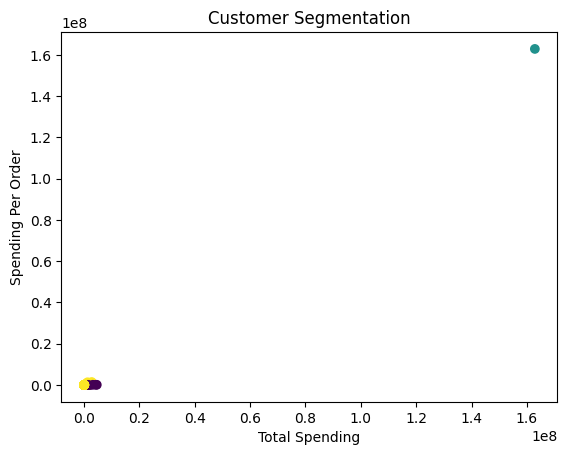

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Select the features for clustering
features = merged_df[['TotalSpending', 'SpendingPerOrder', 'Frequency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Choose the number of clusters (you may need to experiment with this)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
merged_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters (you can customize this part based on your needs)
plt.scatter(merged_df['TotalSpending'], merged_df['SpendingPerOrder'], c=merged_df['Cluster'], cmap='viridis')
plt.xlabel('Total Spending')
plt.ylabel('Spending Per Order')
plt.title('Customer Segmentation')
plt.show()


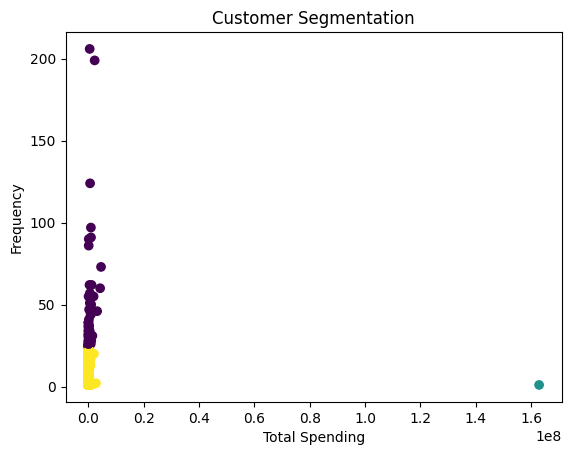

In [16]:
plt.scatter(merged_df['TotalSpending'], merged_df['Frequency'], c=merged_df['Cluster'], cmap='viridis')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.title('Customer Segmentation')
plt.show()

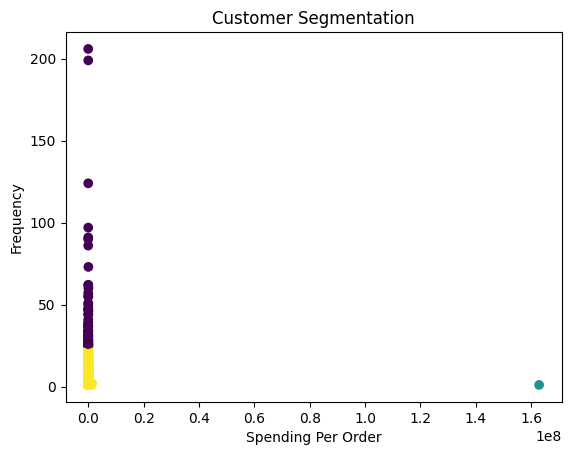

In [17]:
plt.scatter(merged_df['SpendingPerOrder'], merged_df['Frequency'], c=merged_df['Cluster'], cmap='viridis')
plt.xlabel('Spending Per Order')
plt.ylabel('Frequency')
plt.title('Customer Segmentation')
plt.show()

In [21]:
# ดูข้อมูลใน merged_df
merged_df

,UserId,TotalSpending,SpendingPerOrder,Frequency,Cluster
0,259266,1282435.20,1.282435e+06,1,2
1,259287,71518.80,1.021697e+04,7,2
2,259308,23964.48,5.991120e+03,4,2
3,259329,24175.68,2.417568e+04,1,2
4,259350,4886.40,4.886400e+03,1,2
...,...,...,...,...,...
4330,383880,2994.60,2.994600e+03,1,2
4331,383901,1339.20,1.339200e+03,1,2
4332,383922,2956.80,1.478400e+03,2,2
4333,383943,34681.44,2.167590e+03,16,2


In [22]:
len(merged_df)
# จาก Output: มีข้อมูลใน merged_df เท่ากับ 4,335 ข้อมูล

4335

In [19]:
# ดูเฉพาะข้อมูลที่ Cluster ที่อยู่กลุ่ม 0
cluster_0 = merged_df[merged_df['Cluster'] == 0]
cluster_0
# จาก Output: ข้อมูล Cluster ที่อยู่กลุ่ม 0 มีทั้งหมด 74 ข้อมูล

,UserId,TotalSpending,SpendingPerOrder,Frequency,Cluster
100,261891,289100.88,10707.440000,27,0
177,263949,52314.00,1634.812500,32,0
273,266322,182999.64,5903.214194,31,0
304,267120,84979.44,3399.177600,25,0
326,267708,536420.16,2603.981359,206,0
...,...,...,...,...,...
4090,376929,963181.44,21890.487273,44,0
4099,377181,21501.48,551.320000,39,0
4198,380142,4304776.32,71746.272000,60,0
4203,380289,133553.52,5136.673846,26,0


In [23]:
# ดูเฉพาะข้อมูลที่ Cluster ที่อยู่กลุ่ม 1
cluster_1 = merged_df[merged_df['Cluster'] == 1]
cluster_1
# จาก Output: ข้อมูล Cluster ที่อยู่กลุ่ม 1 มีทั้งหมด 1 ข้อมูล

,UserId,TotalSpending,SpendingPerOrder,Frequency,Cluster
1038,288687,1.628434e+08,1.628434e+08,1,1


In [24]:
# ดูเฉพาะข้อมูลที่ Cluster ที่อยู่กลุ่ม 2
cluster_2 = merged_df[merged_df['Cluster'] == 2]
cluster_2
# จาก Output: ข้อมูล Cluster ที่อยู่กลุ่ม 2 มีทั้งหมด 4,260 ข้อมูล

,UserId,TotalSpending,SpendingPerOrder,Frequency,Cluster
0,259266,1282435.20,1.282435e+06,1,2
1,259287,71518.80,1.021697e+04,7,2
2,259308,23964.48,5.991120e+03,4,2
3,259329,24175.68,2.417568e+04,1,2
4,259350,4886.40,4.886400e+03,1,2
...,...,...,...,...,...
4330,383880,2994.60,2.994600e+03,1,2
4331,383901,1339.20,1.339200e+03,1,2
4332,383922,2956.80,1.478400e+03,2,2
4333,383943,34681.44,2.167590e+03,16,2
